# Stock Market Analysis Project

In [1]:
import pandas as pd
import csv
import seaborn as sns
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from datetime import date
import json
%matplotlib inline

In [2]:
# importing stocks from yahoo finance: TESLA (TSLA), General Motors (GM), Ford (F)
start = date(2012,1,1)
end = date(2017,1,1)
GM = wb.DataReader('GM',data_source='yahoo',start=start,end=end) 
FORD = wb.DataReader('F',data_source='yahoo',start=start,end=end)
TESLA = wb.DataReader('TSLA',data_source='yahoo',start=start,end=end)
# for t in tickers:
#     mydata[t] = wb.DataReader(t,data_source='yahoo',start='2012-1-1',end='2017-1-1')

In [3]:
GM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889


In [4]:
FORD.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916


In [5]:
TESLA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450


In [6]:
TESLA.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,42.689999,41.542000,41.599998,42.667999,23352500,42.667999
2016-12-27,44.450001,42.883999,42.976002,43.905998,29578500,43.905998
2016-12-28,44.759998,43.439999,44.306000,43.948002,18912500,43.948002
2016-12-29,43.840000,42.824001,43.712002,42.936001,20225000,42.936001
2016-12-30,43.500000,42.335999,43.259998,42.737999,23213000,42.737999


Text(0, 0.5, 'Open Stock Prices')

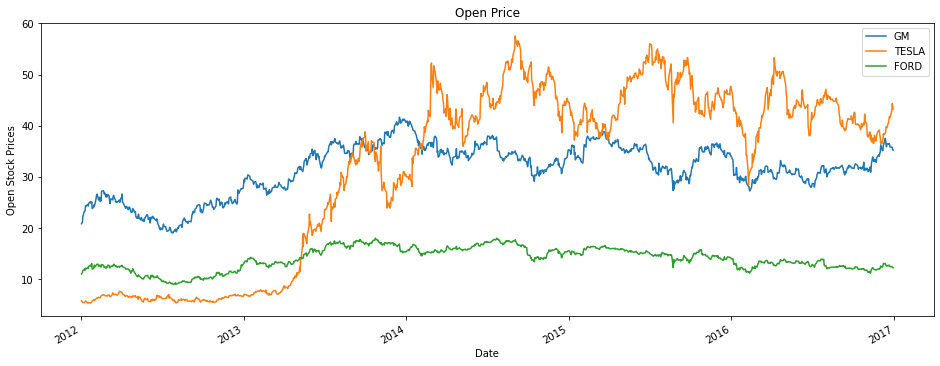

In [8]:
# Plotting the Open Price of the stocks
GM['Open'].plot(label='GM',figsize=(16,6), title= 'Open Price')
TESLA['Open'].plot(label='TESLA')
FORD['Open'].plot(label='FORD')
plt.legend()
plt.ylabel('Open Stock Prices')


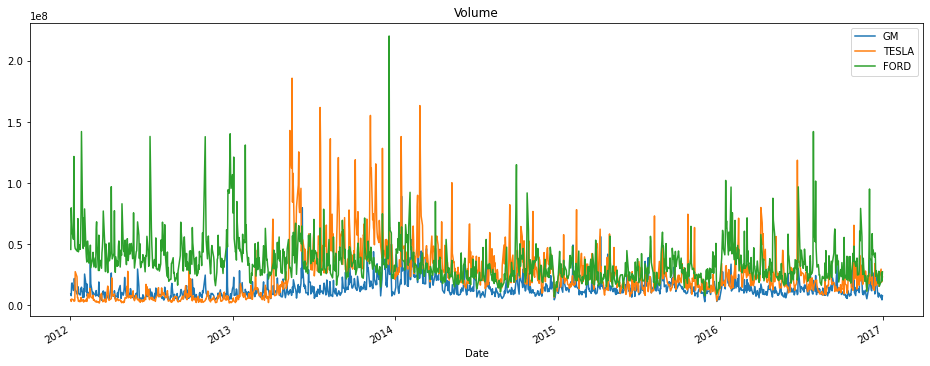

In [9]:
# Plotting the Volume of the stocks
GM['Volume'].plot(label='GM',figsize=(16,6), title= 'Volume')
TESLA['Volume'].plot(label='TESLA')
FORD['Volume'].plot(label='FORD')
plt.legend()


In [10]:
# The date of the spike on trading Volume of FORD
# FORD['Volume'].argmax()
FORD['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

In [11]:
GM['Total Traded'] = GM['Open'] * GM['Volume']
GM.tail()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2016-12-23,35.869999,35.540001,35.830002,35.689999,9351200.0,31.217722,3.350535e+08
2016-12-27,35.930000,35.500000,35.799999,35.540001,6008700.0,31.086515,2.151115e+08
2016-12-28,35.799999,35.130001,35.740002,35.150002,8451900.0,30.745390,3.020709e+08
2016-12-29,35.480000,35.119999,35.250000,35.139999,4416700.0,30.736641,1.556887e+08
2016-12-30,35.310001,34.669998,35.209999,34.840000,7646100.0,30.474236,2.692192e+08


In [12]:
FORD['Total Traded'] = FORD['Open'] * FORD['Volume']
FORD.tail()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2016-12-23,12.46,12.36,12.43,12.46,15621200.0,10.150093,1.941715e+08
2016-12-27,12.51,12.36,12.43,12.39,19467400.0,10.093071,2.419798e+08
2016-12-28,12.45,12.22,12.37,12.25,26875400.0,9.979024,3.324487e+08
2016-12-29,12.31,12.22,12.25,12.23,19819100.0,9.962733,2.427840e+08
2016-12-30,12.28,12.08,12.24,12.13,27405700.0,9.881270,3.354458e+08


In [13]:
TESLA['Total Traded'] = TESLA['Open'] * TESLA['Volume']
TESLA.tail()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2016-12-23,42.689999,41.542000,41.599998,42.667999,23352500,42.667999,9.714640e+08
2016-12-27,44.450001,42.883999,42.976002,43.905998,29578500,43.905998,1.271166e+09
2016-12-28,44.759998,43.439999,44.306000,43.948002,18912500,43.948002,8.379372e+08
2016-12-29,43.840000,42.824001,43.712002,42.936001,20225000,42.936001,8.840752e+08
2016-12-30,43.500000,42.335999,43.259998,42.737999,23213000,42.737999,1.004194e+09


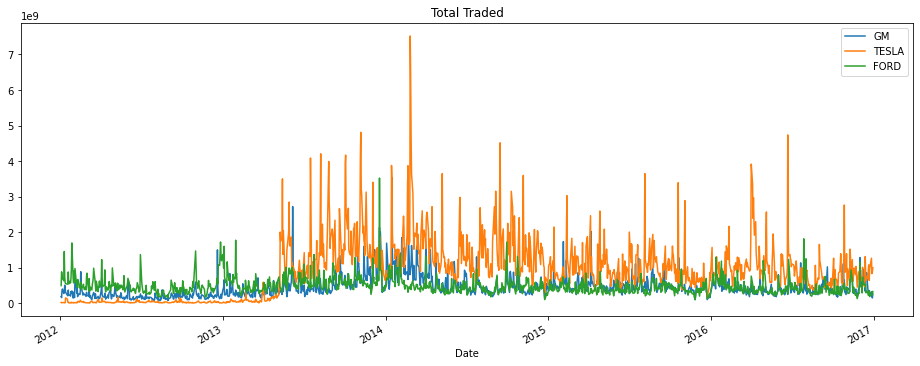

In [14]:
# Plotting the Total Traded of the stocks
GM['Total Traded'].plot(label='GM',figsize=(16,6), title= 'Total Traded')
TESLA['Total Traded'].plot(label='TESLA')
FORD['Total Traded'].plot(label='FORD')
plt.legend()

In [15]:
# The date of the spike on Total trades of Tesla
# FORD['Volume'].argmax()
TESLA['Total Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')